<a href="https://colab.research.google.com/github/mdaugherity/PythonGuide/blob/Solve_BVP/Solve_BVP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How do we solve boundary value problems (BVP's) in python?
Solve_BVP from scipy allows us to do this!

Here is the link to the scipy documentation:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_bvp.html



# Quick Copy-and-Paste Example

---

This solves a projectile motion problem (y'' = -9.8*y) with conditions that y(0) = 0 and y'(2) = 5

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.integrate import solve_bvp
from scipy.optimize import root_scalar

The algorithm converged to the desired accuracy.


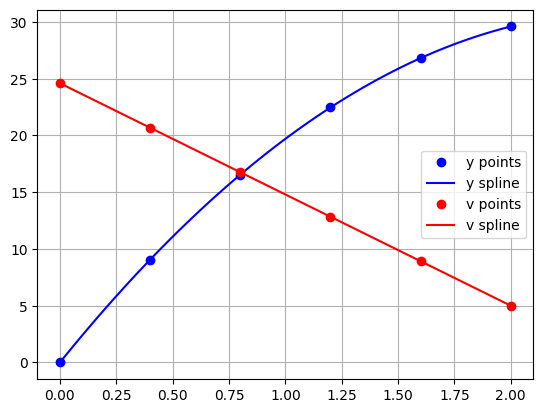

In [ ]:
# Definitions:
# x = 1D array with shape (m)
# y = 2D array with shape (n,m) for n equations

# Define y=[y0, y1] so n=2 with y0=y(t), y1=y0'
def fun(x,y):  # derivative function, returns y' with shape (n,m)
  return np.vstack((y[1], -9.8*np.ones_like(x)))

def bc(ya,yb): # BC residuals for y at both endpoints, returns shape (n)
  # BC: y[0]=0,  y'[2]=5   (ya is y at t=0, yb is y at tf)
  return np.array([ya[0], yb[1]-5])

# Initial values
TMAX = 2
x = np.linspace(0,2,6)
y0 = np.zeros((2,x.size))  # initial guess:  y is shape (n,m)

sol = solve_bvp(fun, bc, x, y0)
print(sol.message)

# Look at points
t = sol.x
y = sol.y[0]
v = sol.y[1]

# Spline Interpolation
ts = np.linspace(0,TMAX, 50)  # points to interpolate
spl = sol.sol(ts)  # splines with shape (n,m)
ys = spl[0]
vs = spl[1]

plt.plot(t,y,'bo', label='y points')
plt.plot(ts,ys,'b-', label='y spline')
plt.plot(t,v,'ro',label='v points')
plt.plot(ts,vs,'r-',label='v spline')
plt.legend()
plt.grid()
plt.show()

# Method
*How is the answer calculated?
This section explains how the magical black boxes work that we will be using.*

IVP verses BVP:

An IVP (initial value problem) has information about the function and its derivative at the SAME starting time. A BVP has information given at DIFFERENT times. An example of an IVP would be finding the position of a ball given that it started in your hand and you released it at a velocity of 5 m/s. A BVP would take one of those conditions and put it at a different time. An example would be that a ball starts in your hand and is going 10 m/s 20 seconds after you release it. BVP's are generally more complicated and harder to solve ecause you have to connect two conditions that are seperated in time. Luckily, the python function, solve_BVP can be used to solve these with careful setup.

Solve_BVP chooses its method based on the BVP provided:

One potential method is the shooting method. This method essentially guesses and checks the solution starting with an initial guess until it is within a certain error. This method is typically used for simpler BVP's

Another method is the finite difference method. This method takes advantage of centered-difference derivatives. Taking these derivatives have the effect of averaging between neighboring points. This fascinating video from 3Blue1Brown demonstrates this point well: https://www.youtube.com/watch?v=ly4S0oi3Yz8Iterating . Iterating these derivatives over and over has the effect of "relaxing" into the correct answer and is often called the "method of relaxation."



# Implementation
*This section shows how to actually use the numpy or scipy functions. Show the functions we need, what the parameters are, and how to use them.  Give links to documentation.*

Before describing the inputs to provide solve_BVP, first a couple definitions:

x is a 1D array with size m where m is the number of mesh points.

y is a 2D array with shape (n,m) where n is the number of equations your differential equation provides.

Here are the inputs you must provide the solve_BVP function:

1) fun(x,y): This function represents the differential equation by outputing the derivatives you input. For n = 2, you would want a y input of (y0, y1) to output (y1,y'') where y'' is provided by your differentian equation. The examples later make this more clear.

2) bc(ya,yb): This function represents your boundary conditions. ya represents y at t = 0 and yb represents y at t_final. ya[0] would be a boundary condition of the function and ya[1] would be a boundary condition of the derivative. If the boundary condition number is not zero you must substract out what number it is. For example, if the boundary conditions were y(0) = -3 and y'(7) = 5, your bc function should return (ya[0] + 3, yb[1] - 5)

3) x: This is simply your mesh of points. For example, you could set x = np.linspace(0,10,100) which would provide you with 100 equally spaced points between 0 and 10. m in this case would be 100.

4) y: This represents your intial guess. It must be of dimensions (n,m), so a good way to call it for a typical n =  2 problem if you want to guess all zeros would be y = np.zeros((2,x.size)). Sometimes guessing zeros can leave you with a nonchanging solutions so using np.ones() may work better.


# Examples

## Example 1 - projectile motion with conditions: y(0) = 0 and y(2) = 10
What initial speed does the ball have so that it is 10 m above the ground 2 seconds later?

The algorithm converged to the desired accuracy.


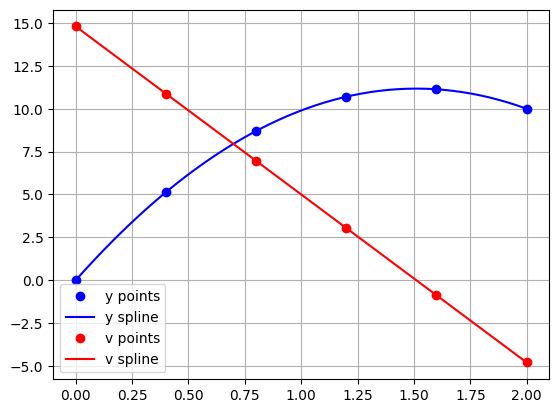

In [ ]:
# Definitions:
# x = 1D array with shape (m)
# y = 2D array with shape (n,m) for n equations

# Define y=[y0, y1] so n=2 with y0=y(t), y1=y0'
def fun(x,y):  # derivative function, returns y' with shape (n,m)
  return np.vstack((y[1], -9.8*np.ones_like(x)))

def bc(ya,yb): # BC residuals for y at both endpoints, returns shape (n)
  # BC: y[0]=0,  y[2]=10   (ya is y at t=0, yb is y at tf)
  return np.array([ya[0], yb[0]-10])

# Initial values
TMAX = 2
x = np.linspace(0,2,6)
y0 = np.zeros((2,x.size))  # initial guess:  y is shape (n,m)

sol = solve_bvp(fun, bc, x, y0)
print(sol.message)

# Look at points
t = sol.x
y = sol.y[0]
v = sol.y[1]

# Spline Interpolation
ts = np.linspace(0,TMAX, 50)  # points to interpolate
spl = sol.sol(ts)  # splines with shape (n,m)
ys = spl[0]
vs = spl[1]

plt.plot(t,y,'bo', label='y points')
plt.plot(ts,ys,'b-', label='y spline')
plt.plot(t,v,'ro',label='v points')
plt.plot(ts,vs,'r-',label='v spline')
plt.legend()
plt.grid()
plt.show()

# EXAMPLE 2
y'' = 4t - 4y with BC y(0)=0 and y'(2)=0

The algorithm converged to the desired accuracy.


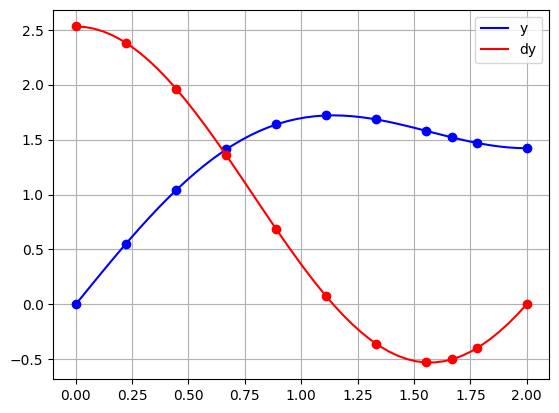

In [ ]:
# Definitions:
# x = 1D array with shape (m)
# y = 2D array with shape (n,m) for n equations

# Define y=[y0, y1] so n=2 with y0=y(t), y1=y0'
def fun(x,y):  # derivative function, returns y' with shape (n,m)
  return np.vstack((y[1], 4*x - 4*y[0]))

def bc(ya,yb): # BC residuals for y at both endpoints, returns shape (n)
  # BC: y[0]=0,  y'[2]=5   (ya is y at t=0, yb is y at tf)
  return np.array([ya[0], yb[1]-0])

# Initial values
TMAX = 2
x = np.linspace(0,2,10)
y0 = np.zeros((2,x.size))  # initial guess:  y is shape (n,m)

sol = solve_bvp(fun, bc, x, y0)
print(sol.message)

# Look at points
t = sol.x
y = sol.y[0]
v = sol.y[1]

# Spline Interpolation
ts = np.linspace(0,TMAX, 50)  # points to interpolate
spl = sol.sol(ts)  # splines with shape (n,m)
ys = spl[0]
vs = spl[1]

plt.plot(t,y,'bo')
plt.plot(ts,ys,'b-', label='y')
plt.plot(t,v,'ro')
plt.plot(ts,vs,'r-',label='dy')
plt.legend()
plt.grid()
plt.show()

# Common Errors

Initial guess: If your initial guess is too far off, it could lead to an incorrect solution or an error. Make sure you plot your solution so it looks reasonable.

Convergence: If the problem is poorly posed to begin with, solve_BVP won't work. For example, if you have boundary conditions that cannot be true at the same time.

In [2]:
# Make sure to import the proper libraries before running your code
solution = solve_bvp(f)
print(solution)

"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.integrate import solve_bvp
from scipy.optimize import root_scalar

"""

NameError: name 'solve_bvp' is not defined